In [0]:
from scipy.integrate import tplquad
import numpy as np
import math
import matplotlib.pyplot as plt


In [0]:
def declination(w):       
    ab = abs(w-182.5)
    dec = 0.41 - ((0.41*ab)/91.25)
    return dec  

In [0]:
def f(u,v,t):
    constraint = np.cos(t-u) + np.tan(declination(w))*np.sinh(v/a)
    if (constraint > 0):
        return a*np.cosh(v/a)*np.cos(declination(w))*(np.cos(t-u)+np.tan (declination(w))*np.sinh(v/a))
    else:
        return 0

In [0]:
results=dict()
de=dict()
p=np.pi * 40.7 / 180
a=7*np.pi/12
while (a<np.pi):
 area=a*np.pi/2*(2+a*np.sinh(2/a))
 sum=0.0
 for w in range (0,364):
    results[(a,w)]=tplquad(f, np.arcsin(-np.tan(p)*np.tan(declination(w))), np.pi-(np.arcsin(-np.tan (p) * np.tan (declination(w)))), lambda v:0.0, lambda v:1.0/10, lambda u,v:(-np.pi/2)+a,lambda u,v:(3*np.pi/2)-a,epsabs=10, epsrel=100)[0]
    de[(a,w)]=results[(a,w)]/area
    sum = sum + de[(a,w)]
 print (a,sum)
 a= a + np.pi/12
  


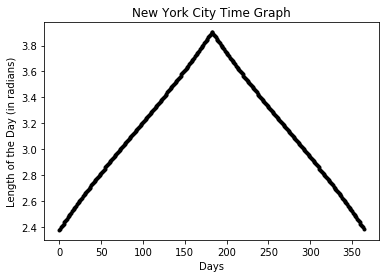

In [0]:
plt.title("New York City Time Graph")
p=np.pi * 40.7 / 180
for w in range (0,365):
  xy=(np.pi-(np.arcsin(-np.tan (p) * np.tan (declination(w)))))-(np.arcsin(-np.tan(p)*np.tan(declination(w))))
  plt.plot(w, xy, marker=".", color="black", markeredgecolor="black")
plt.ylabel('Length of the Day (in radians)')
plt.xlabel('Days')
plt.show()

